# Agriculture Raw Material Prices Apr 1990 - June 2020

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lr

# Dataset Loading & Cleaning

In [1]:
from google.colab import files
uploaded = files.upload()

Saving agricultural_raw_material.csv to agricultural_raw_material.csv


In [0]:
df = pd.read_csv("agricultural_raw_material.csv")

In [61]:
df.head(5)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [0]:
#Creating two new columns, year and month where I am splitting them from the original column Month which has both!
years = []
for i in df['Month']:
    years.append(int((i.split("-")[1])))
df['year'] = years

months = []
for i in df['Month']:
    months.append(str((i.split("-")[0])))
df['month'] = months

In [0]:
# Convert months from given string values to int for convenience!
month_dict = {"Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12, "Jan":1, "Feb":2, "Mar":3}

df["month"] = df["month"].map(month_dict).astype("int16")

df.drop("Month", axis=1, inplace=True)

In [0]:
# changing the year to thousand year for better readability!
years1 = []
for i in df['year']:
    if i < 89:
        years1.append(2000+i)
    else:
        years1.append(1900+i)

df['year'] = years1

In [19]:
df.dtypes.count()

26

In [0]:
#After dropping the previous "Month" column in the previous 2 cells, I am merging the two previously created columns "year" and
# "month" into one, to represent them in a datetime format!
df["date"] = [str(year) + '/' + str(month) for year,month in zip(df["year"], df["month"])]
df["date_dt"] = pd.to_datetime(df["date"])
df.set_index("date_dt", inplace=True)
df.drop("date", axis=1, inplace=True)

In [0]:
dtype_df = pd.DataFrame({"columns":df.dtypes.index,
             "dtype":[str(s) for s in df.dtypes.values]})

In [0]:
str_col = dtype_df[dtype_df["dtype"]=="object"]["columns"].values

In [22]:
str_col

array(['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price',
       'Copra price % Change', 'Cotton price % Change', 'Fine wool Price',
       'Fine wool price % Change', 'Hard log price % Change',
       'Hard sawnwood price % Change', 'Hide price % change',
       'Plywood price % Change', 'Rubber price % Change',
       'Softlog price % Change', 'Soft sawnwood price % Change',
       'Wood pulp price % Change'], dtype=object)

In [0]:
for c in str_col:
    l1 = []
    l2 = []
    l3 = []
#change '-' to '0'
    for i in df[c]:
        if i == '-':
            result = '0'
            l1.append(result)
        else:
            result = i
            l1.append(result)

#replace ',' to ''
    for i in l1:
        if ',' in str(i):
            result = i.replace(",", "")
            l2.append(result)
        else:
            result = i
            l2.append(result)
    
#replace '%' to '' and change to float
    for i in l2:
        if '%' in str(i):
            result = float(i.replace("%", ""))
            l3.append(result)
        else:
            result = float(i)
            l3.append(result)

    df[c] = l3
    del l1, l2, l3

In [0]:
dtype_df_2 = pd.DataFrame({"columns":df.dtypes.index,
             "dtype":[str(s) for s in df.dtypes.values]})

float_col = dtype_df_2[dtype_df_2["dtype"] == "float64"]["columns"].values
int_col = dtype_df_2[dtype_df_2["dtype"] == "int64"]["columns"].values

df[float_col] = df[float_col].astype("float32")
df[int_col] = df[int_col].astype("int16")

In [0]:
date_columns = ['year', 'month']

column_prices = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price',
                 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price',
                 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

column_ratios = ['Coarse wool price % Change', 'Copra_price_%_Change', 'Cotton_price_%_Change', 'Fine_wool_price_%_Change', 
                 'Hard_log_price_%_Change', 'Hard_sawnwood_price_%_Change', 'Hide_price_%_change', 'Plywood_price_%_Change', 
                 'Rubber_price_%_Change', 'Softlog_price_%_Change', 'Soft_sawnwood_price_%_Change', 'Wood_pulp_price_%_Change']

In [0]:
#I decided to drop the NAN values considering that it consists only 5% of the the entire dataset, therefore
# my dataset will consists only info from 04/01/1990 till 06/01/2017
df = df.dropna()

In [0]:
df2 = df.drop(['year','month'],axis=1)

In [0]:
df2['total_price'] = df2[column_prices].sum(axis=1)

# Exploratory Data Analysis

Text(0.5, 0, 'year')

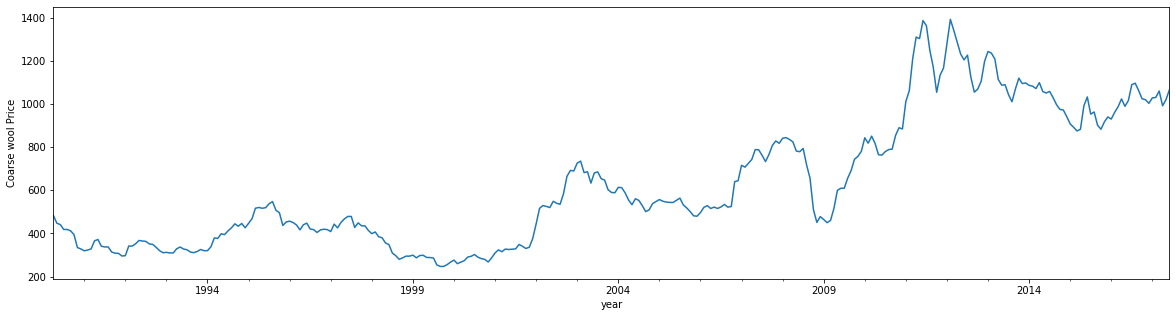

In [56]:
df2['Coarse wool Price'].plot(figsize=(20,5))
plt.ylabel('Coarse wool Price')
plt.xlabel('year')

In [0]:
def bar_plot(df, column_prices, date_columns, groupby_col='year', value_label="price"):
    df_ = df[column_prices+date_columns]
    ave = df_.groupby(groupby_col)[column_prices].mean()
    
    fig, ax = plt.subplots(4, 3, figsize=(30, 24))
    plt.subplots_adjust(hspace=0.4)
    for i in range(0,4):
        for j in range(0,3):
            ax[i,j].bar(ave.index, ave.iloc[:,i*3+j])
            ax[i,j].set_xlabel(groupby_col)
            ax[i,j].set_ylabel(value_label)
            ax[i,j].set_title(column_prices[i*3+j])

    plt.show()

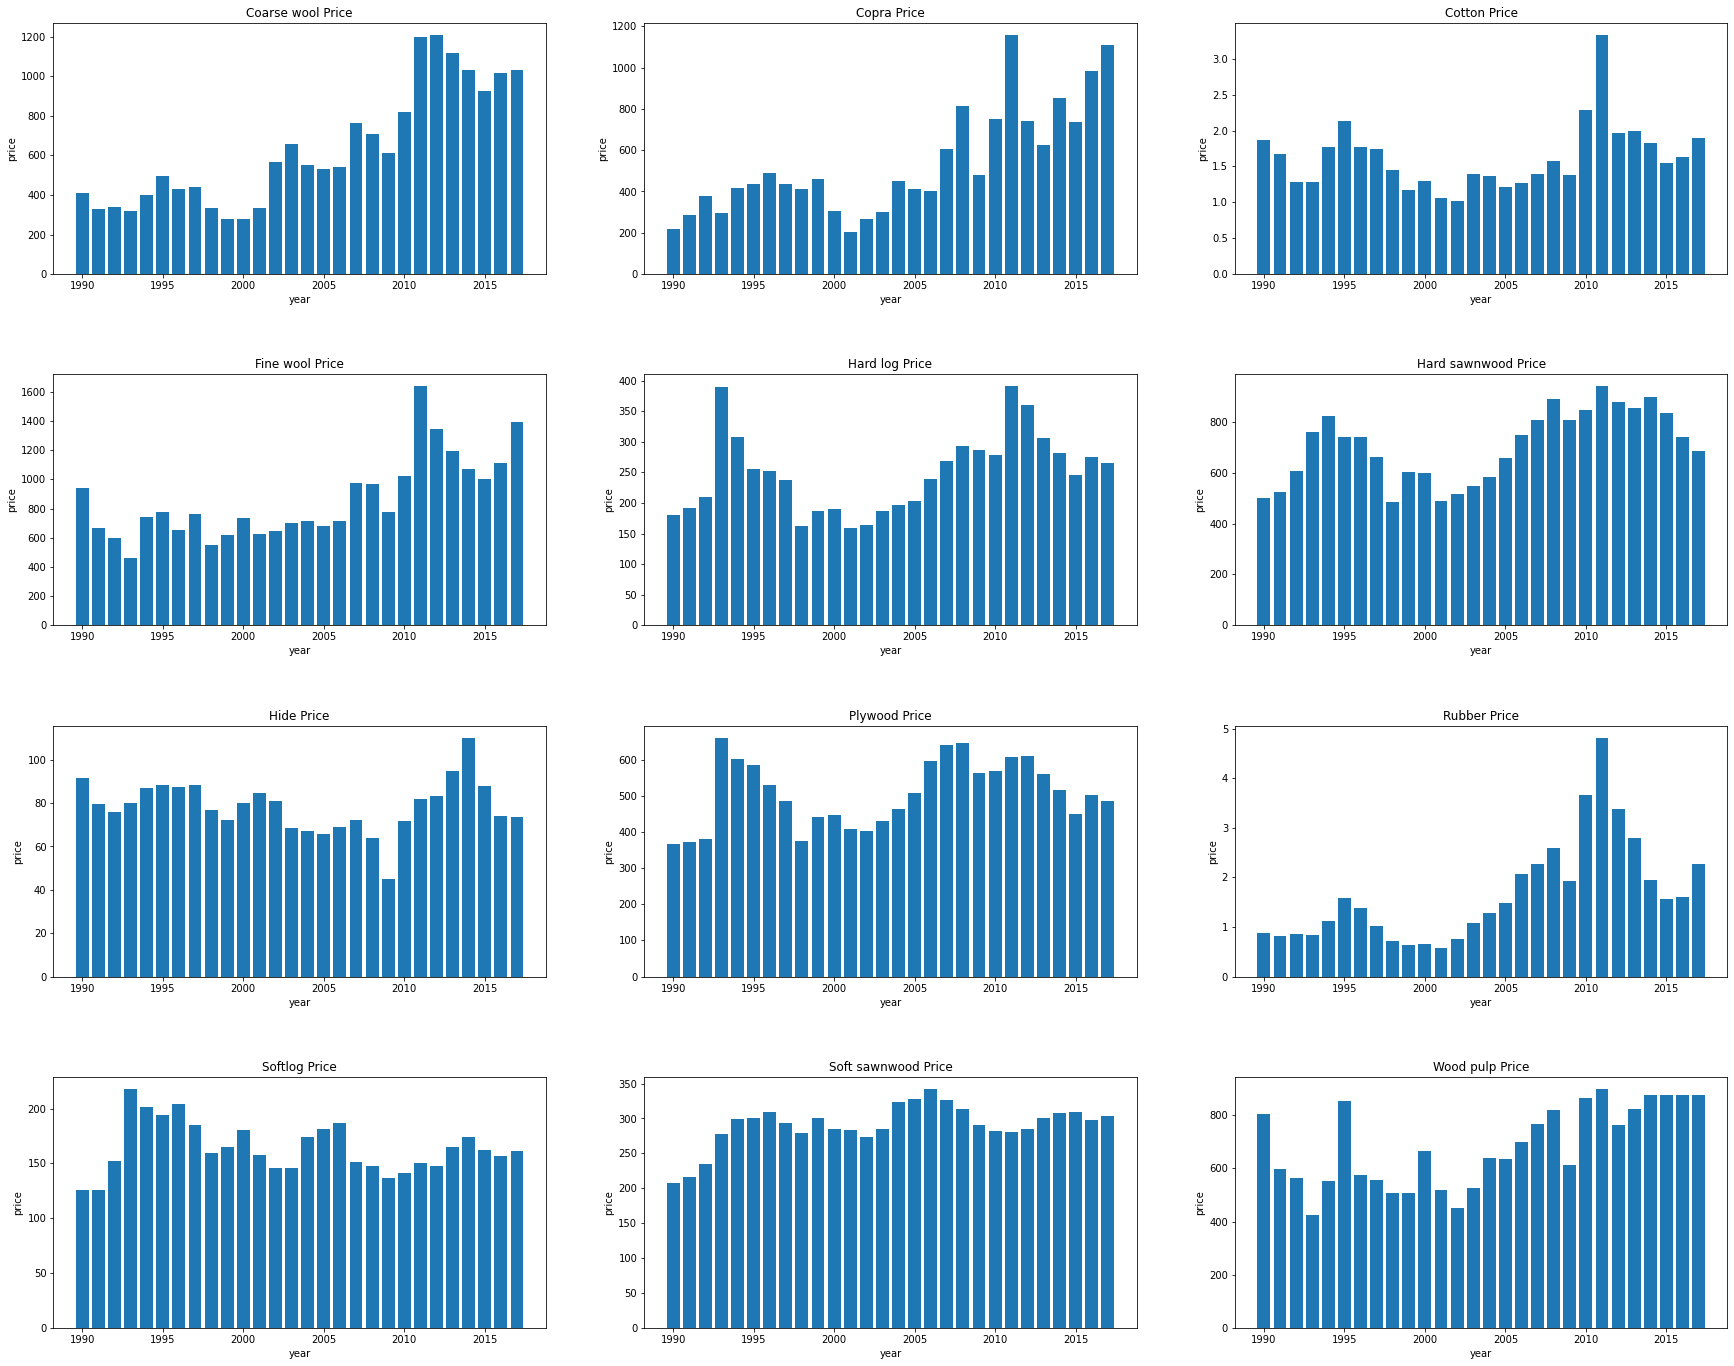

In [37]:
#Representation of price with a bar plot for all the products individually yearly based!
bar_plot(df, column_prices, date_columns, groupby_col='year', value_label="price")

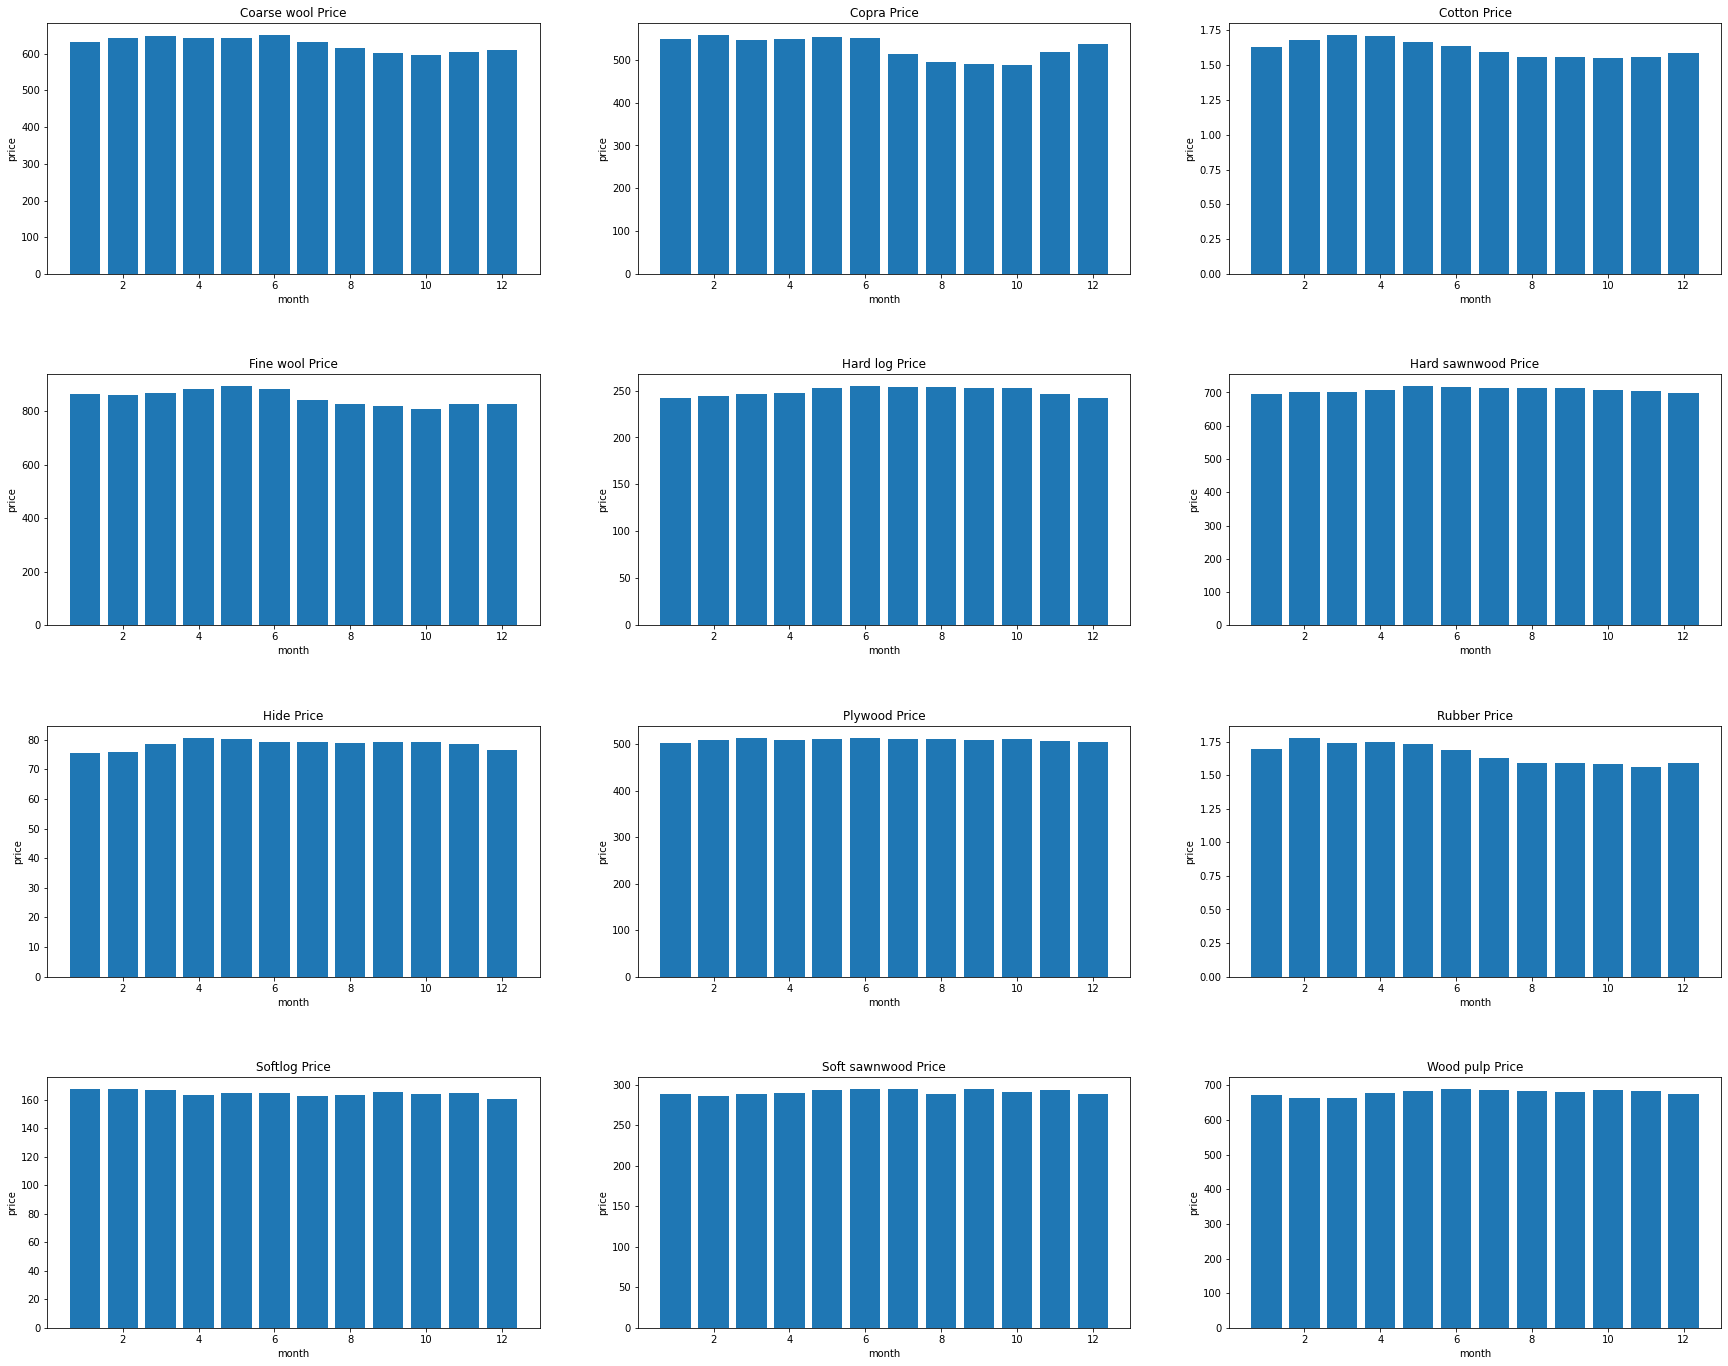

In [41]:
#Representation with a bar plot for all the products individually monthly based!
bar_plot(df, column_prices, date_columns, groupby_col='month', value_label="price")

Text(0.5, 0, 'year')

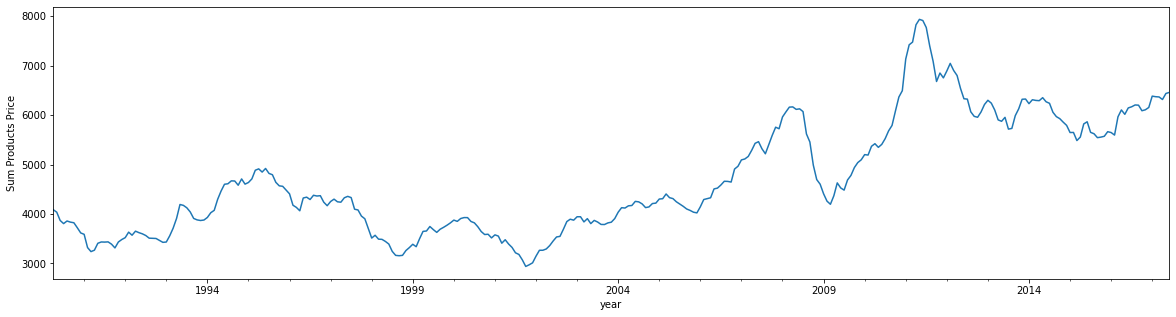

In [54]:
#Trend of total price of all products for each month!
df2['total_price'].plot(figsize=(20,5))
plt.ylabel('Sum Products Price')
plt.xlabel('year')

In [0]:
data=pd.read_csv('agricultural_raw_material.csv',index_col='Month')


data=data.dropna()
data=data.iloc[1:-2]
I,J=data.shape
for i in range(I):
    for j in range(J):
        data.iloc[i,j]=str((data.iloc[i,j])).replace('%','')
        data.iloc[i,j]=(data.iloc[i,j]).replace(',','')
data=data.astype('float')

Dl=list(range(1,len(data.columns),2))
clm=data.columns
data=data.drop(columns=clm[Dl])



#Splitting data into train and test set

X=data.loc[:'Mar-17']
Y=data.loc['Jun-90':]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Building A Model

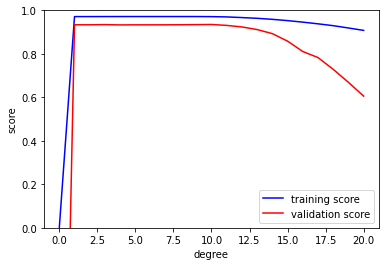

In [45]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),Lr(**kwargs))

degree = np.arange(0, 21)

Product='Wood pulp Price'
Xvld=X[Product]
Yvld=Y[Product]

train_score, val_score = validation_curve(PolynomialRegression(), Xvld[:,None], Yvld[:,None],'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

In [0]:
Model=[]
Clm=X.columns
Ypr_test=np.zeros((len(X_test),len(Clm)))
Ypr_train=np.zeros((len(X_train),len(Clm)))
for i in range(len(X.columns)):
    Model.append(make_pipeline(PolynomialFeatures(2,include_bias=True),Lr()))
    Xin=X_train[Clm[i]]
    Yin=Y_train[Clm[i]]
    Model[i].fit(Xin[:,None],Yin)
    Xtstin=X_test[Clm[i]]
    Ypr_test[:,i]=Model[i].predict(Xtstin[:,None])
    Ypr_train[:,i]=Model[i].predict(Xin[:,None])
Ypr_test = pd.DataFrame(Ypr_test,columns=Clm,index=Y_test.index) 
Ypr_train = pd.DataFrame(Ypr_train,columns=Clm,index=Y_train.index) 

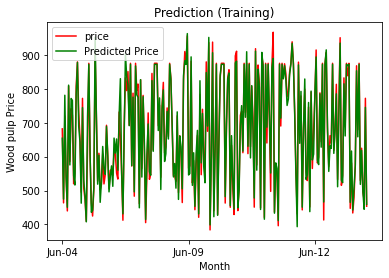

In [47]:
Product='Wood pulp Price'

ax = plt.axes()
ax.plot(Y_train[Product],'r',label='price')
ax.plot(Ypr_train[Product],'g',label='Predicted Price')
ax.legend(loc='upper left')
ax.set_title('Prediction (Training)')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xlabel("Month")
ax.set_ylabel(Product)
plt.show()

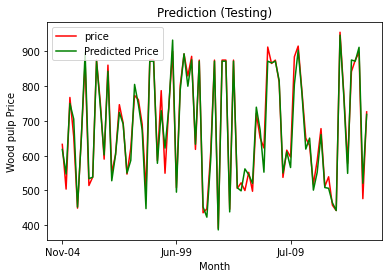

In [48]:
Product='Wood pulp Price'
ax = plt.axes()
ax.plot(Y_test[Product],'r',label='price')
ax.plot(Ypr_test[Product],'g',label='Predicted Price')
ax.legend(loc='upper left')
ax.set_title('Prediction (Testing)')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xlabel("Month")
ax.set_ylabel(Product)
plt.show()

#Predicting Future Values

In [49]:
Xnew=X_test.iloc[50]
print(Y_test.iloc[50])

NumProd=len(X_test.columns)
Ypredict=np.zeros([NumProd])
for i in range(NumProd):
    Ypredict[i]=Model[i].predict(np.reshape(Xnew[i],(1,1)))
print(pd.Series(Ypredict,index=Xnew.index))

Coarse wool Price      384.83
Copra Price            378.00
Cotton Price             1.51
Fine wool Price        625.92
Hard log Price         190.94
Hard sawnwood Price    506.13
Hide Price              82.61
Plywood Price          388.53
Rubber Price             0.74
Softlog Price          153.96
Soft sawnwood Price    278.62
Wood pulp Price        497.79
Name: Mar-98, dtype: float64
Coarse wool Price      408.592913
Copra Price            375.539651
Cotton Price             1.524179
Fine wool Price        635.670953
Hard log Price         204.417719
Hard sawnwood Price    509.001619
Hide Price              77.547142
Plywood Price          415.565895
Rubber Price             0.825100
Softlog Price          163.182770
Soft sawnwood Price    281.449871
Wood pulp Price        520.458151
dtype: float64
